In [94]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("../Mu-Helper/muhelper")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/SystemCharacterization/../Mu-Helper/muhelper/helper_visa.py'>

In [95]:
filepath = "../Keysight/data_waveform/"
filenames= ["waveform_fiber_BCF92_laser_1pe.joblib", "waveform_fiber_Y11_laser_1pe.joblib"]

# data_save=joblib.load("data_waveform/waveform_fiber_Y11_laser_1pe.joblib")
# data_save=joblib.load("data_waveform/waveform_fiber_BCF92_laser_1pe.joblib")


In [96]:
# plot(np.mean(np.array(data_save[1])[inds_keep],axis=0));
# plot(np.array(data_save[1])[inds_keep][6]);


In [97]:
i=0
data_save=joblib.load(filepath+f"{filenames[i]}")
time_series = data_save["metadata"]["time_series"]*1e9

pulses_raw = np.array(data_save[1])

# inds_keep,cut_passage_fraction = hp.cut_pulses(pulses_raw, cut_iterations = 1, cut_amp=[0.003,0.007], cut_triggerpoint = False)
trace_info = hp.get_pulses_info(pulses_raw, pre_trig=800, threshold_in_sigma=5, gaussian_filter_sigma=3)

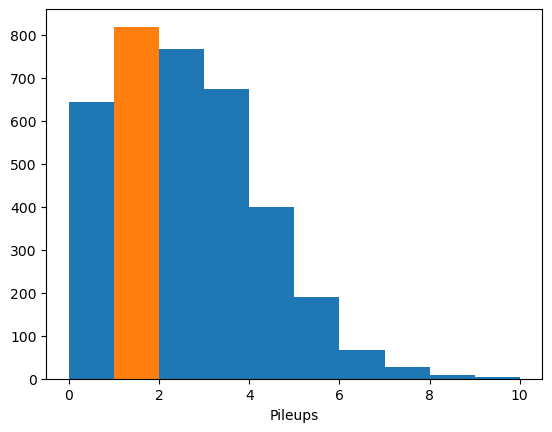

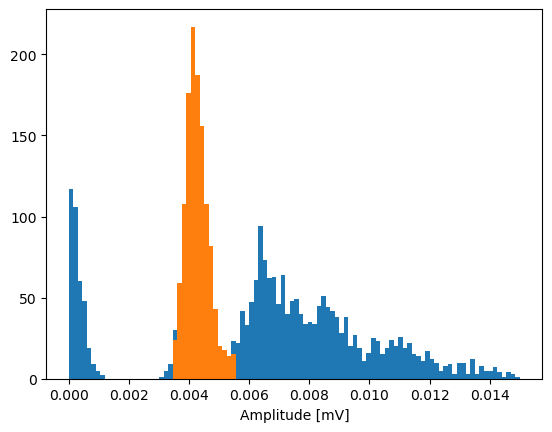

passage_fraction 0.20027777777777778
[258.28227081   1.97119075] [28.18337391  0.10282947]


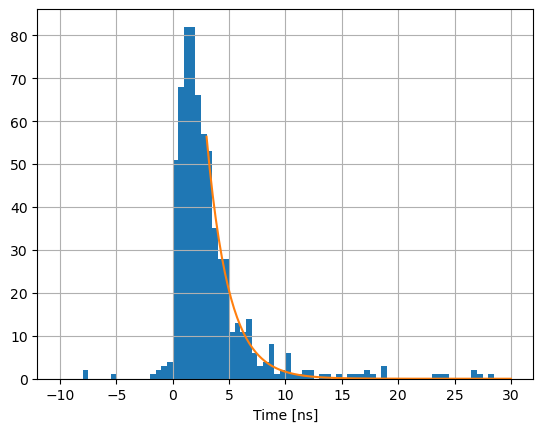

In [100]:
trace_pileups = trace_info[:,-3]
mask_pileup = trace_pileups==1
hist(trace_pileups, range=(0,10),bins=10,log=0);
hist(trace_pileups[mask_pileup], range=(0,10),bins=10,log=0);
xlabel("Pileups")
show()

# Select only 1pe event
trace_amp = trace_info[:,-1]
mask_amp = abs(trace_amp - 0.0045)<0.001
hist(trace_amp,bins=100, range=(0,0.015));
hist(trace_amp[mask_amp],bins=100, range=(0,0.015));
xlabel("Amplitude [mV]")
show()



trigger_time_ind = np.copy(trace_info[:,-2])
trigger_time = time_series[trigger_time_ind.astype(int)]
trigger_time_selected_1pe = trigger_time[mask_amp&mask_pileup]
passage_fraction = sum(mask_amp&mask_pileup)/len(mask_amp)
print("passage_fraction",passage_fraction)


n,ibins,_ = hist(trigger_time_selected_1pe,bins=80,range=(-10,30));
bincenters= 0.5*(ibins[1:]+ibins[:-1])

x=bincenters
y=n
# popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y),x[np.argmax(y)],2,10], maxfev=1000, makeplot=True)
exp = lambda x, A,tau: A*np.exp(-x/tau)
popt, pcov, info, f = hp.fit_curve(exp,x,y, p0=[np.max(y),10], fit_range=(3,30),maxfev=1000, makeplot=True)

# yscale("log")
# xlim(-5,45)
ylim(-0.0002,)
grid(which="both")
xlabel("Time [ns]")
print(popt, np.sqrt(np.diag(pcov)))

[ 3.51939337e+00  3.02760451e+01  3.02337418e+01 -6.01876806e-04
  6.03038945e-04  1.05004321e+00  1.06540425e-03]


/home/mathusla/tofpet/Mu-Hardware/SystemCharacterization/../Mu-Helper/muhelper/helper_basic.py:61: RuntimeWarning: divide by zero encountered in true_divide
  pulse/=max(pulse)
/home/mathusla/tofpet/Mu-Hardware/SystemCharacterization/../Mu-Helper/muhelper/helper_basic.py:61: RuntimeWarning: invalid value encountered in true_divide
  pulse/=max(pulse)


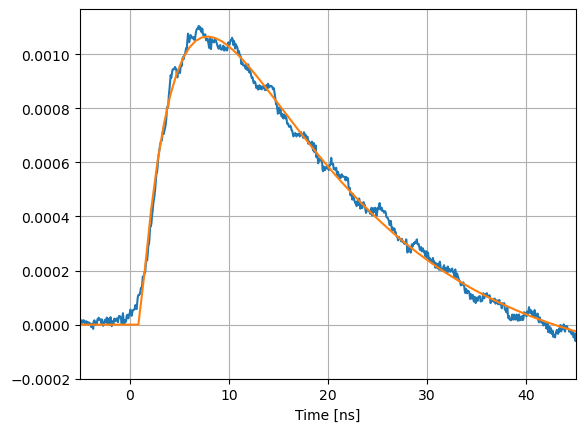

In [59]:
#-----------------------------------------------------------------------------------------
# Make average pulse
pulse_avg = hp.make_avg_pulse(pulses_raw, cut_iterations = 1, cut_amp=[0.003,0.007], cut_triggerpoint = False)
pulse_avg-=np.mean(pulse_avg[:1000])

# PLot and fit
plot(time_series, pulse_avg)
x=time_series
y=pulse_avg
popt, pcov, info, f = hp.fit_curve(hp.Pulse2,x,y, p0=[0.5,5,20,np.max(y),np.max(y)/2,x[np.argmax(y)],np.max(y)], maxfev=1000, makeplot=True)

# yscale("log")
xlim(-5,45)
ylim(-0.0002,)
grid(which="both")
xlabel("Time [ns]")
print(popt)

In [60]:
# pulse_save = {"time_series_ns":time_series,
#               "averaged_pulse_1pe_volt":trace_aligned_avg}
# joblib.dump(pulse_save,"data_waveform/averaged_pulse_1pe_preamp_v4_40.7V.joblib")